In [259]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVC
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, get_scorer_names

In [278]:
df = pd.read_csv('exams.csv')
df['average score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
gender = df['gender']
race = df['race/ethnicity']
parental_education = df['parental level of education']
lunch = df['lunch']
test_prep_course = df['test preparation course']
math_score = df['math score']
reading_score = df['reading score']
writing_score = df['writing score']
average_score = df['average score']
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group D,some college,standard,completed,59,70,78,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,84.666667
...,...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71,75.000000
996,male,group C,some college,standard,none,80,66,66,70.666667
997,female,group A,high school,standard,completed,67,86,86,79.666667
998,male,group E,high school,standard,none,80,72,62,71.333333


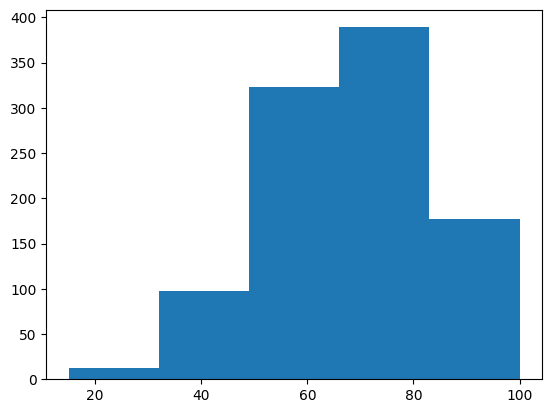

In [261]:
plt.hist(math_score, bins=5);

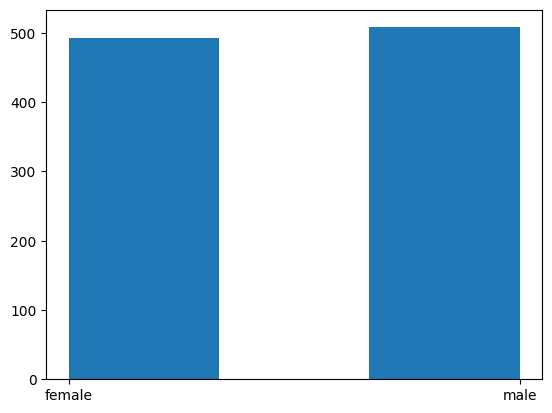

In [262]:
plt.hist(gender, bins=3);

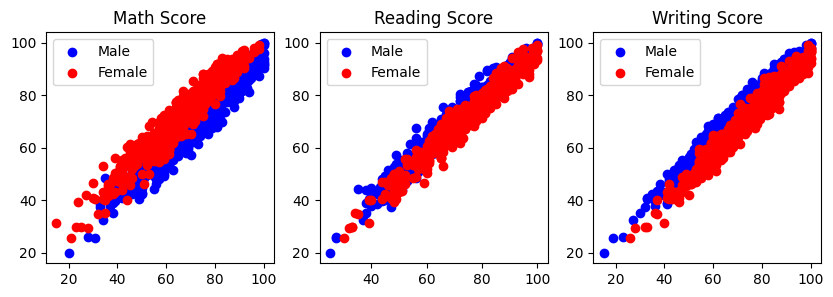

In [263]:
# Create the subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# Add a scatter plot to each subplot for males
axs[0].scatter(math_score[gender=='male'], average_score[gender=='male'], c='blue', label='Male')
axs[0].set_title('Math Score')

axs[1].scatter(reading_score[gender=='male'], average_score[gender=='male'], c='blue', label='Male')
axs[1].set_title('Reading Score')

axs[2].scatter(writing_score[gender=='male'], average_score[gender=='male'], c='blue', label='Male')
axs[2].set_title('Writing Score')

# Add a scatter plot to each subplot for females
axs[0].scatter(math_score[gender=='female'], average_score[gender=='female'], c='red', label='Female')
axs[1].scatter(reading_score[gender=='female'], average_score[gender=='female'], c='red', label='Female')
axs[2].scatter(writing_score[gender=='female'], average_score[gender=='female'], c='red', label='Female')

# Add a legend to each subplot
for ax in axs:
    ax.legend()

# Show the plot
plt.show()


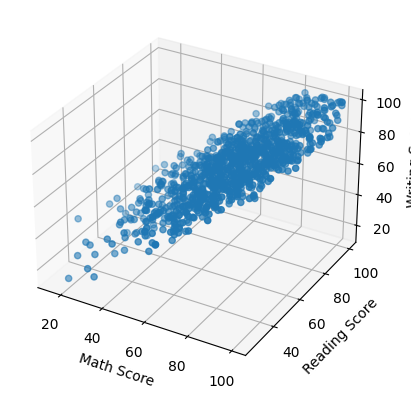

In [264]:
x = df['math score']
y = df['reading score']
z = df['writing score']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')
ax.set_zlabel('Writing Score')

plt.show()

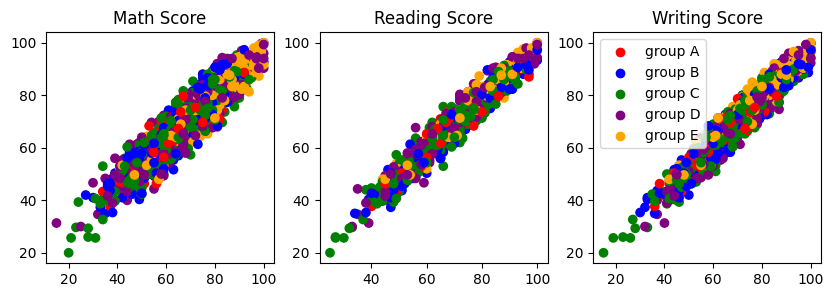

In [265]:
colors = {'group A': 'red', 'group B': 'blue', 'group C': 'green', 'group D': 'purple', 'group E': 'orange'}

# Create the subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# Add a scatter plot to each subplot
for i, score_type in enumerate(['math score', 'reading score', 'writing score']):
    axs[i].scatter(df[score_type], df['average score'], c=df['race/ethnicity'].map(colors))
    axs[i].set_title(score_type.title())

    # Add a legend for each ethnicity
    for eth, col in colors.items():
        axs[i].scatter([], [], c=col, label=eth)

axs[i].legend()

# Show the plot
plt.show()

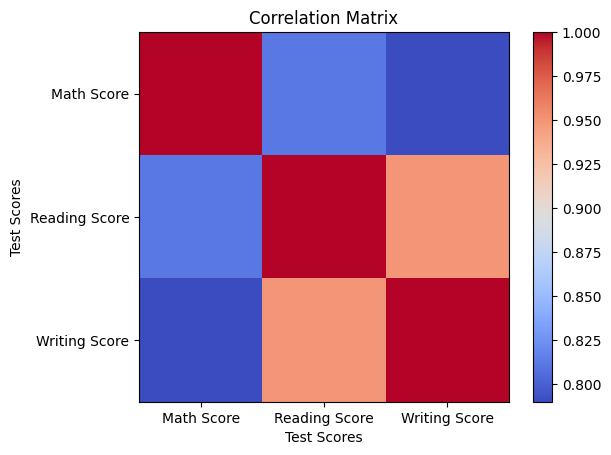

In [266]:
# Select the columns of interest
scores = df[['math score', 'reading score', 'writing score']]

# Calculate the correlation matrix
corr_matrix = scores.corr()

# Create the heatmap
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')

# Add a colorbar
plt.colorbar()

# Set the axis labels
plt.xlabel('Test Scores')
plt.ylabel('Test Scores')

# Set the x and y tick labels
plt.xticks([0, 1, 2], ['Math Score', 'Reading Score', 'Writing Score'])
plt.yticks([0, 1, 2], ['Math Score', 'Reading Score', 'Writing Score'])

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


In [267]:
def preprocess_inputs(df):
    bd = df.copy()

    # encode gender
    bd['gender'].replace({'female': 0, 'male': 1}, inplace=True)

    # encode test preparation
    bd['test preparation course'].replace({'completed': 1, 'none': 0}, inplace=True)

    # encode lunch
    bd['lunch'].replace({'standard': 1, 'free/reduced': 0}, inplace=True)

    # encoding race/ethnicity
    onehot = OneHotEncoder()
    onehot_encoded = onehot.fit_transform(bd[['race/ethnicity']]).toarray()
    onehot_df = pd.DataFrame(onehot_encoded, columns=['group A', 'group B', 'group C', 'group D', 'group E'])

    bd_encoded = pd.concat([bd, onehot_df], axis=1)
    bd_encoded.drop(['race/ethnicity'], axis=1, inplace=True)

    # encoding parental level of education
    labels = ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]

    encoder = OrdinalEncoder(categories=[labels])
    parental_edu_encoded = encoder.fit_transform(bd_encoded[['parental level of education']])
    bd_encoded['parental level of education'] = parental_edu_encoded
    
    return bd_encoded
    
preprocess_inputs(df)


,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,group A,group B,group C,group D,group E
0,0,2.0,1,1,59,70,78,69.000000,0.0,0.0,0.0,1.0,0.0
1,1,3.0,1,0,96,93,87,92.000000,0.0,0.0,0.0,1.0,0.0
2,0,2.0,0,0,57,76,77,70.000000,0.0,0.0,0.0,1.0,0.0
3,1,2.0,0,0,70,70,63,67.666667,0.0,1.0,0.0,0.0,0.0
4,0,3.0,1,0,83,85,86,84.666667,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,2.0,1,0,77,77,71,75.000000,0.0,0.0,1.0,0.0,0.0
996,1,2.0,1,0,80,66,66,70.666667,0.0,0.0,1.0,0.0,0.0
997,0,1.0,1,1,67,86,86,79.666667,1.0,0.0,0.0,0.0,0.0
998,1,1.0,1,0,80,72,62,71.333333,0.0,0.0,0.0,0.0,1.0


In [268]:
X = bd_encoded.drop(['math score'], axis=1)
y = bd_encoded['math score']

In [269]:
def func_tt_split(X,y):
    x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7)
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
    return x_train,x_test,y_train,y_test

X_train,X_test,y_train,y_test = func_tt_split(X,y);

In [270]:
models={
    'Logistic Regression':LogisticRegression(),
    #Random Forest Regressor
    'Random Forest': RandomForestRegressor(),
    #Decision Tree Regressor
    'Decision Tree': DecisionTreeRegressor(),
    #Neural Network
    'MLP Classifier': MLPRegressor(),
    'Linear Support Vector': LinearSVC()
}

In [271]:
for name, model in models.items():
    model.fit(x_train,y_train)
    print(name)
    print(model.score(x_test,y_test))

Logistic Regression
0.02
Random Forest
-0.07432567827525305
Decision Tree
-0.9551815181009022


/opt/anaconda3/envs/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Classifier
-0.38541577029571616
Linear Support Vector
0.02


/opt/anaconda3/envs/venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [302]:
param_grid = {
    'n_estimators': [100, 200, 500, 750],
    'max_features': [1.0, 'sqrt', 'log2']
}

# Create the estimator
estimator = RandomForestRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=estimator,
                           param_grid=param_grid,
                           scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
                           refit= 'r2',
                           cv=2,
                           verbose=1,
                           pre_dispatch='2*n_jobs',
                           error_score='raise',
                           return_train_score=False)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best parameters: {'max_features': 1.0, 'n_estimators': 500}
Best score: 0.9486393214483486


In [319]:
Test_element = ([0, 2.0, 1, 1, 70, 78, 69.000000, 0.0, 0.0, 0.0, 1.0, 0.0])
Test_element = np.array(Test_element).reshape(1, -1)
predictions = grid_search.predict(Test_element)
y_preds = grid_search.predict(X_test)
predictions

/opt/anaconda3/envs/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([96.576])